In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import umap

C:\Users\yedidyab\Anaconda3\envs\piplnew\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_path = r'X:\yedidyab\dl_project\test_data\temp_files\props_df\*'
cell_by_OD_path = r'X:\yedidyab\dl_project\test_data\merged_cell_by_OD.raw.txt'
# encoding_file_path = r'X:\dl4cv_project\data_for_einav\Outputs\encodings.csv'
encoding_file_path = r'X:\dl4cv_project\data_for_einav2\all_channels\Outputs_l32\encodings.csv'
# filenames_path = r'X:\dl4cv_project\data_for_einav\Outputs\filenames.csv'
filenames_path = r'X:\dl4cv_project\data_for_einav2\all_channels\Outputs_l32\filenames.csv'


In [3]:
# concatenate df_prop files
dfs = []
for file in glob.iglob(df_path):
    name = '_'.join(file.split('\\')[-1].split('_')[:2])
    if 'single' in file:
        df = pd.read_csv(file)
        df['field_of_view'] = name
        dfs.append(df)
prop_df = pd.concat(dfs)
print(len(prop_df))

10296


In [4]:
#load cell_by_OD
od = pd.read_csv(cell_by_OD_path, sep = '\t')[['field_of_view','cell_id','sample_name']]
od.rename(columns={'cell_id':'label', 'sample_name':'OD'}, inplace=True)


In [5]:
# merge od_df with props_df
df = od.merge(prop_df, on = ['field_of_view','label'])

# clean no signal cells
df=df[pd.to_numeric(df['OD'], errors='coerce').notnull()]

#sort by OD
df['OD'] = pd.to_numeric(df.OD)
df.sort_values(by = 'OD', inplace=True)
df.label = df['label'].apply(str)
df['fov_label'] = df.field_of_view + '_' + df.label
df.drop(['field_of_view','label','label.1'], axis=1, inplace=True)

df

,OD,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,extent,orientation,eccentricity,equivalent_diameter_area,...,ribo_sum,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv,fov_label
4695,0.06,308,32.416624,12.165001,689.344156,1665.214286,0.550000,-0.533912,0.926915,19.802974,...,1140534,5852.5,3145.5,5634.4,2938.4,0.452671,0.278521,0.208293,0.405754,fov_12_1137
6162,0.06,304,29.541675,13.138919,1562.332237,959.680921,0.608000,-0.972035,0.895650,19.673963,...,1262105,7068.5,3664.5,6165.4,2890.8,0.358620,0.351764,0.336750,0.334906,fov_12_2672
1055,0.06,244,25.106664,12.396022,614.323770,1904.536885,0.847222,1.523737,0.869613,17.625846,...,657658,4416.0,1940.0,4243.6,1710.0,0.241787,0.328593,0.576695,0.442629,fov_11_1097
262,0.06,253,26.745474,12.139431,186.426877,517.375494,0.620098,0.473451,0.891059,17.947969,...,796519,6574.0,2900.0,6128.0,2777.8,0.468466,0.460893,0.237729,0.221126,fov_11_268
10253,0.06,331,32.513908,13.086719,1977.661631,97.326284,0.821340,-1.527009,0.915422,20.529060,...,912811,5240.0,2712.0,5075.0,2533.0,0.496430,0.659807,0.162900,0.094257,fov_13_3449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,6.10,149,18.567379,10.229675,1369.664430,1424.040268,0.620833,0.837042,0.834539,13.773623,...,825491,5941.0,4269.0,5584.4,3299.0,0.422453,0.304589,0.307578,0.472946,fov_13_2393
2398,6.10,169,19.099377,11.276010,1325.461538,1688.745562,0.722222,0.430449,0.807121,14.668929,...,330516,5261.0,1916.0,5064.0,1845.2,0.848241,0.774969,0.048181,0.070504,fov_11_2483
5127,6.10,184,19.702545,11.888669,939.516304,1173.043478,0.807018,1.310145,0.797433,15.306080,...,544742,4992.0,2968.0,4899.6,2844.6,0.938441,0.869377,0.020214,0.041834,fov_12_1592
2400,6.10,159,20.501158,9.876505,1324.327044,183.176101,0.697368,1.181668,0.876307,14.228320,...,510772,6467.0,3198.0,6179.8,3037.6,0.648389,0.786739,0.084203,0.058093,fov_11_2485


In [6]:
def plot_boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df)
    plt.show()

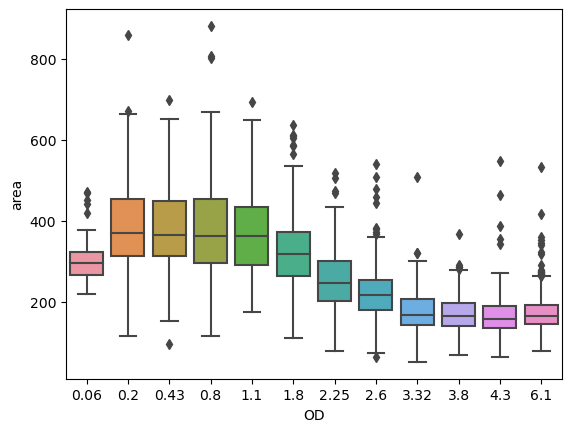

In [16]:
#plot area by OD
plot_boxplot(df, 'OD', 'area')

In [8]:
# Import the CSV file into a pandas DataFrame
filenames = pd.read_csv(filenames_path, names = ['path'])

# Extract only the file name from the path
filenames.path = filenames.path.str.split('/').str[-1]

# Extract the field of view from the file name
filenames['field_of_view'] = filenames.path.str.split('_').str[:2]
filenames.field_of_view = 'fov_' + filenames.field_of_view.str[1]

# Extract the label from the file name
filenames['label'] = filenames.path.str.split('_').str[5]

filenames

,path,field_of_view,label
0,fov_11_hyb_1_label_1000_bb_974_570.npy,fov_11,1000
1,fov_11_hyb_1_label_1001_bb_807_583.npy,fov_11,1001
2,fov_11_hyb_1_label_1002_bb_1315_570.npy,fov_11,1002
3,fov_11_hyb_1_label_1004_bb_588_574.npy,fov_11,1004
4,fov_11_hyb_1_label_1005_bb_1154_589.npy,fov_11,1005
...,...,...,...
7947,fov_13_hyb_1_label_995_bb_1030_599.npy,fov_13,995
7948,fov_13_hyb_1_label_996_bb_1326_601.npy,fov_13,996
7949,fov_13_hyb_1_label_997_bb_652_593.npy,fov_13,997
7950,fov_13_hyb_1_label_998_bb_506_594.npy,fov_13,998


In [9]:
encoding = pd.read_csv(encoding_file_path, header=None)
encoding['field_of_view'] = filenames.field_of_view
encoding['label'] = filenames.label
encoding['fov_label'] = encoding.field_of_view + '_' + encoding.label

encoding.drop(['field_of_view','label'], axis=1, inplace=True)
encoding

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,fov_label
0,-0.500521,0.954300,0.072174,0.778904,0.448625,0.422179,0.298988,-0.061739,1.477017,-0.029326,...,2.442705,0.158322,-0.029667,0.736960,-0.007491,0.124701,1.244069,-0.243371,-0.114197,fov_11_1000
1,-0.840813,0.541640,0.804696,-1.257922,-0.796230,-0.844389,0.301094,-0.143178,0.002468,-2.491886,...,-0.130948,-0.308923,0.447843,0.459835,0.458216,-0.376331,1.376765,-0.427448,-0.115547,fov_11_1001
2,-0.016597,0.389667,1.309243,0.034349,-1.307902,-0.167024,2.277011,-0.469458,0.004999,0.330104,...,0.087169,-0.623457,1.189426,-1.452099,0.161872,0.086936,-0.077916,0.001811,-0.184661,fov_11_1002
3,0.026450,0.039808,0.152467,0.785804,-0.973850,0.041155,0.809891,0.202184,1.363206,-0.056035,...,-0.218445,-0.228615,1.256916,-0.712305,-0.365027,-0.010581,0.952692,0.081238,-0.004575,fov_11_1004
4,0.088527,1.515484,1.402585,0.062440,0.347238,-0.590874,-0.416237,-0.223197,0.165260,-0.152237,...,-0.138440,-0.264429,-0.081048,-0.893505,-0.902469,1.985072,-0.389008,0.971387,0.465861,fov_11_1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,-0.479909,-0.251003,-0.946805,0.299925,-1.803225,-0.019452,2.055164,0.657572,-0.170010,4.612457,...,0.080861,-1.854210,0.103777,0.261291,-0.676427,-0.640706,-0.009919,-0.647014,0.105251,fov_13_995
7948,-0.000879,-0.843939,0.132687,-0.025943,1.147030,-1.735172,0.004706,3.546106,-0.360951,1.545877,...,-0.099250,0.281365,0.021303,0.038099,-0.241745,0.483858,0.204923,-1.840649,-0.068093,fov_13_996
7949,3.851642,-0.006598,0.211445,0.646578,-1.529635,-3.230545,-0.130809,0.407279,0.110136,-0.041257,...,0.799104,0.525773,0.136394,-0.033885,0.050917,-0.103071,0.469123,-0.000781,1.241933,fov_13_997
7950,0.539697,0.020270,-0.148366,1.828750,0.280054,0.020196,0.126590,-0.339448,0.963040,0.795558,...,-0.193758,-0.565560,0.514572,0.176826,0.047952,-0.163767,1.387909,-0.268045,0.383108,fov_13_998


In [10]:
assert len(encoding.fov_label) == len(df.fov_label)
assert len(encoding.fov_label.unique()) == len(encoding.fov_label)
assert len(df.fov_label.unique()) == len(df.fov_label)


AssertionError: 

In [11]:
merged_df = encoding.merge(df, on='fov_label')
correlation = merged_df.corr()

In [12]:
merged_df.OD

0       2.25
1       3.32
2       0.80
3       4.30
4       1.80
        ... 
7224    6.10
7225    2.60
7226    3.32
7227    2.60
7228    1.10
Name: OD, Length: 7229, dtype: float64

<AxesSubplot: >

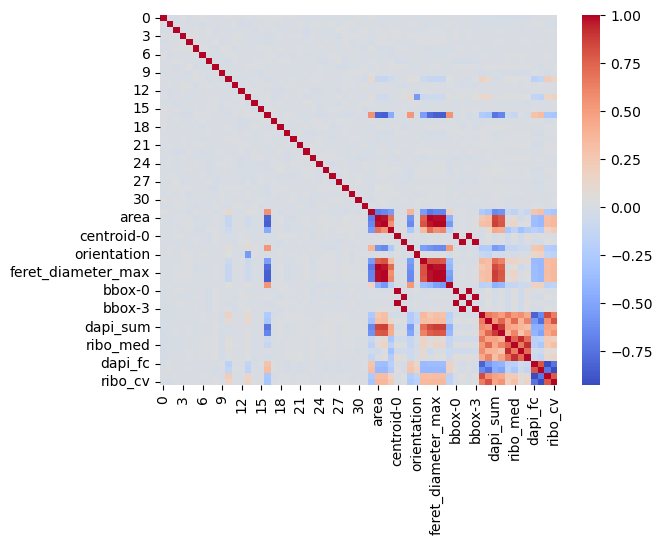

In [13]:
sns.heatmap(correlation, annot=False, cmap='coolwarm')


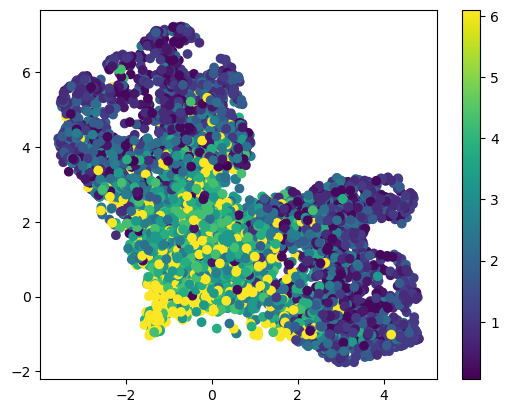

In [14]:
# Split the latent space columns from the "OD" column
latent_space = merged_df.iloc[:, :32].values
categories = merged_df['OD'].values

# Perform UMAP dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_space)

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis')
plt.colorbar()
plt.show()

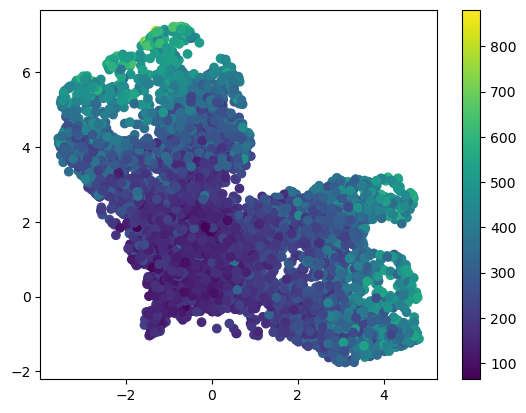

In [17]:
categories = merged_df['area'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis')
plt.colorbar()
plt.show()

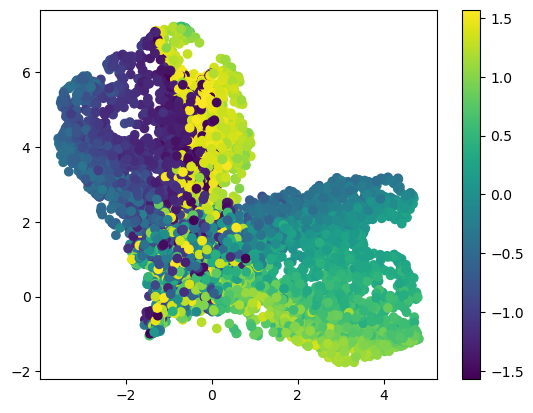

In [19]:
categories = merged_df['orientation'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis')
plt.colorbar()
plt.show()

In [18]:
merged_df.columns

Index([                         0,                          1,
                                2,                          3,
                                4,                          5,
                                6,                          7,
                                8,                          9,
                               10,                         11,
                               12,                         13,
                               14,                         15,
                               16,                         17,
                               18,                         19,
                               20,                         21,
                               22,                         23,
                               24,                         25,
                               26,                         27,
                               28,                         29,
                               30,                     